In [127]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,median_absolute_error,explained_variance_score,mean_squared_log_error
import xgboost as xgb
from sklearn.model_selection import learning_curve

import warnings
warnings.filterwarnings('ignore')

Importing Dataset

In [130]:
train_data = pd.read_csv('train.csv').drop('id',axis=1)

In [131]:
test_data = pd.read_csv('test.csv').drop('id',axis=1)

In [132]:
print(train_data.shape)
print(test_data.shape)

(188533, 12)
(125690, 11)


In [133]:
train_data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [134]:
test_data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [135]:
sub_data = pd.read_csv('sample_submission.csv').drop('id',axis=1)

In [137]:
original = pd.concat([train_data, test_data], ignore_index=True)

In [138]:
original.shape

(314223, 12)

In [139]:
original.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200.0
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999.0
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900.0
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000.0
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500.0


In [142]:
original.tail()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
314218,Mercedes-Benz,GL-Class GL 450 4MATIC,2014,83315,Gasoline,362.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Black,None reported,Yes,NaN
314219,Audi,Q7 55 Prestige,2019,29336,Gasoline,3.0 Liter Turbo,Automatic,White,Black,None reported,NaN,NaN
314220,Audi,A6 3.0T Premium Plus,2012,77634,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,NaN
314221,Audi,Q7 3.0T Premium,2012,112000,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,NaN
314222,Chevrolet,Tahoe LT,2018,66840,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Black,None reported,Yes,NaN


In [146]:
original.isnull().sum()

brand                0
model                0
model_year           0
milage               0
fuel_type         8466
engine               0
transmission         0
ext_col              0
int_col              0
accident          4084
clean_title      35658
price           125690
dtype: int64

In [150]:
original.dtypes

brand            object
model            object
model_year        int64
milage            int64
fuel_type        object
engine           object
transmission     object
ext_col          object
int_col          object
accident         object
clean_title      object
price           float64
dtype: object

In [152]:
print('fuel_type',original['fuel_type'].unique())
print('accident',original['accident'].unique())
print('clean_title',original['clean_title'].unique())
      

fuel_type ['Gasoline' 'E85 Flex Fuel' nan 'Hybrid' 'Diesel' 'Plug-In Hybrid' '–'
 'not supported']
accident ['None reported' 'At least 1 accident or damage reported' nan]
clean_title ['Yes' nan]


In [153]:
original.describe(include='O')

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
count,314223,314223,305757,314223,314223,314223,314223,310139,278565
unique,57,1898,7,1118,52,319,156,2,1
top,Ford,F-150 XLT,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes
freq,38353,4868,276473,5651,83036,81028,179287,240777,278565


In [155]:
# Let see NUll values
missing = original.isnull().sum().reset_index()
missing.columns = ['Features','Missing_Count']
missing['Missing%'] = missing['Missing_Count']/original.shape[0]*100
missing[missing['Missing_Count']>0]

,Features,Missing_Count,Missing%
4,fuel_type,8466,2.694265
9,accident,4084,1.299714
10,clean_title,35658,11.347992
11,price,125690,40.000255


In [158]:
print(original['accident'].unique())

['None reported' 'At least 1 accident or damage reported' nan]


In [159]:
original['accident'].fillna('None reported',inplace=True)
original['accident'].unique()

array(['None reported', 'At least 1 accident or damage reported'],
      dtype=object)

In [160]:
print(original['clean_title'].unique())

['Yes' nan]


In [161]:
original['clean_title'].fillna('No',inplace=True)
original['clean_title'].unique()

array(['Yes', 'No'], dtype=object)

In [163]:
original.shape

(314223, 12)

In [164]:
import pandas as pd
import numpy as np

# Define a function to extract fuel type from the engine description
def get_fuel_type_from_engine(engine: str) -> str:
    engine = str(engine).lower()  # Ensure it's treated as a string and converted to lowercase for easier matching
    if 'gasoline' in engine:
        return 'Gasoline'
    elif 'diesel' in engine:
        return 'Diesel'
    elif 'hybrid' in engine:
        return 'Hybrid'
    elif 'e85' in engine or 'flex fuel' in engine:
        return 'E85 Flex Fuel'
    elif 'plug-in hybrid' in engine:
        return 'Plug-In Hybrid'
    return 'NA'  # If no match, return 'NA'

# Define a function to extract fuel type from the model name
def get_fuel_type_from_model(model: str) -> str:
    model = str(model).lower()  # Convert model to lowercase for easier matching
    if 'gasoline' in model:
        return 'Gasoline'
    elif 'diesel' in model:
        return 'Diesel'
    elif 'hybrid' in model:
        return 'Hybrid'
    elif 'e85' in model or 'flex fuel' in model:
        return 'E85 Flex Fuel'
    elif 'plug-in hybrid' in model:
        return 'Plug-In Hybrid'
    return 'NA'  # If no match, return 'NA'

# Function to handle missing values in the fuel_type column
def impute_fuel_type(original: pd.DataFrame) -> pd.DataFrame:
    original = original.copy()
    
    # Step 1: Fill missing fuel_type values with 'NA'
    original['fuel_type'].fillna('NA', inplace=True)

    # Step 2: Apply the functions to get fuel type from engine and model
    original['fuel_type_engine'] = original['engine'].apply(get_fuel_type_from_engine)
    original['fuel_type_model'] = original['model'].apply(get_fuel_type_from_model)

    # Step 3: Replace 'NA' values in fuel_type with values from engine/model
    original['fuel_type'] = np.where(
        original['fuel_type'] == 'NA',  # If fuel_type is 'NA'
        np.where(original['fuel_type_engine'] != 'NA', original['fuel_type_engine'],  # If engine provides a valid value
                 np.where(original['fuel_type_model'] != 'NA', original['fuel_type_model'], 'NA')),  # Else use model or leave as 'NA'
        original['fuel_type']  # Else, retain the existing value
    )

    # Step 4: Drop temporary columns used for imputation
    original.drop(columns=['fuel_type_engine', 'fuel_type_model'], inplace=True)
    
    return original

# Apply the imputation function on the train_data variable
original = impute_fuel_type(original)  # Assuming 'train_data' is your DataFrame


In [168]:
# Cleaning fuel type
original['fuel_type'].replace(['ev', 'eV', 'Battery', 'Ev', 'Electric', 'motor'], 'EV', inplace=True)
original['fuel_type'].replace(['E85 Flex Fuel'], 'Flex', inplace=True)
original['fuel_type'].replace(['Plug-In Hybrid'], 'Hybrid', inplace=True)

In [172]:
# Drop rows where 'NA' appears in any column
#original = original[original.apply(lambda row: 'NA' not in row.values, axis=1)]


In [173]:
print(original['fuel_type'].unique())


['Gasoline' 'Flex' 'NA' 'Hybrid' 'Diesel' '–' 'not supported']


<Axes: xlabel='clean_title', ylabel='count'>

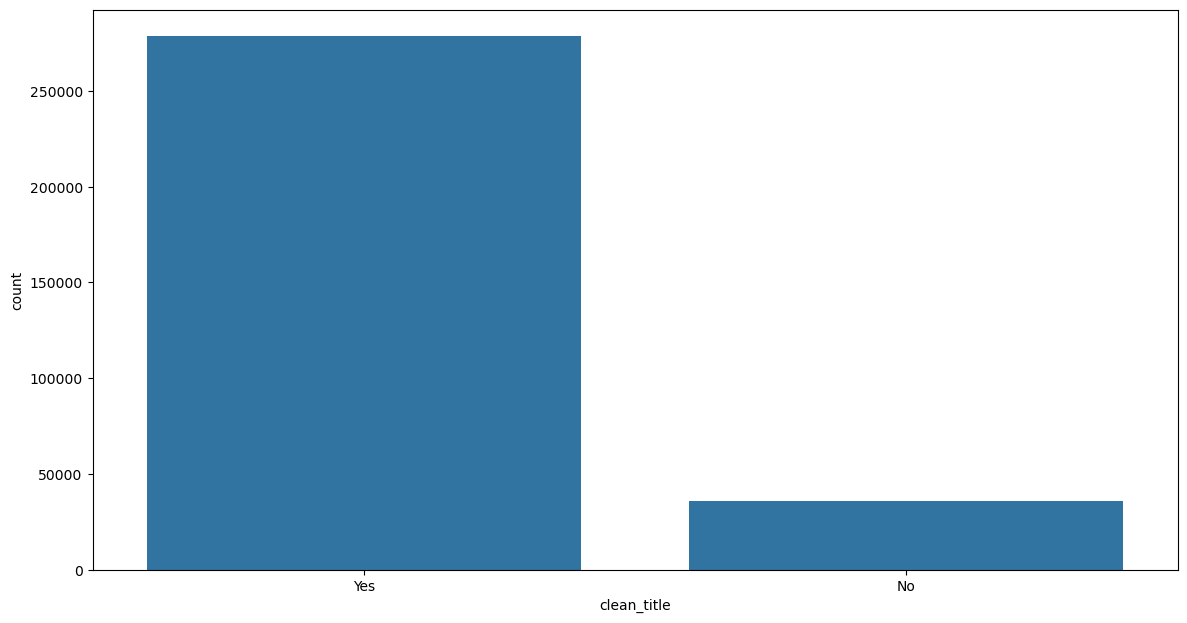

In [174]:
plt.figure(figsize=(14,16))
plt.subplot(211)
sns.countplot(x=original.clean_title)

<Axes: xlabel='accident', ylabel='count'>

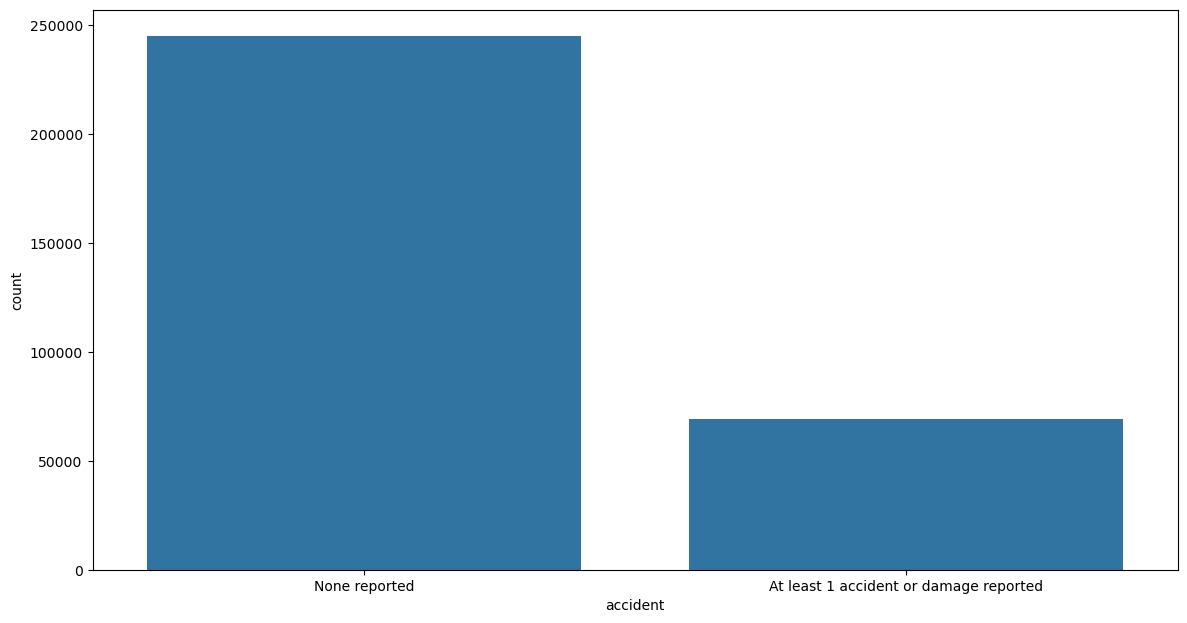

In [176]:
plt.figure(figsize=(14,16))
plt.subplot(211)
sns.countplot(x=original.accident)

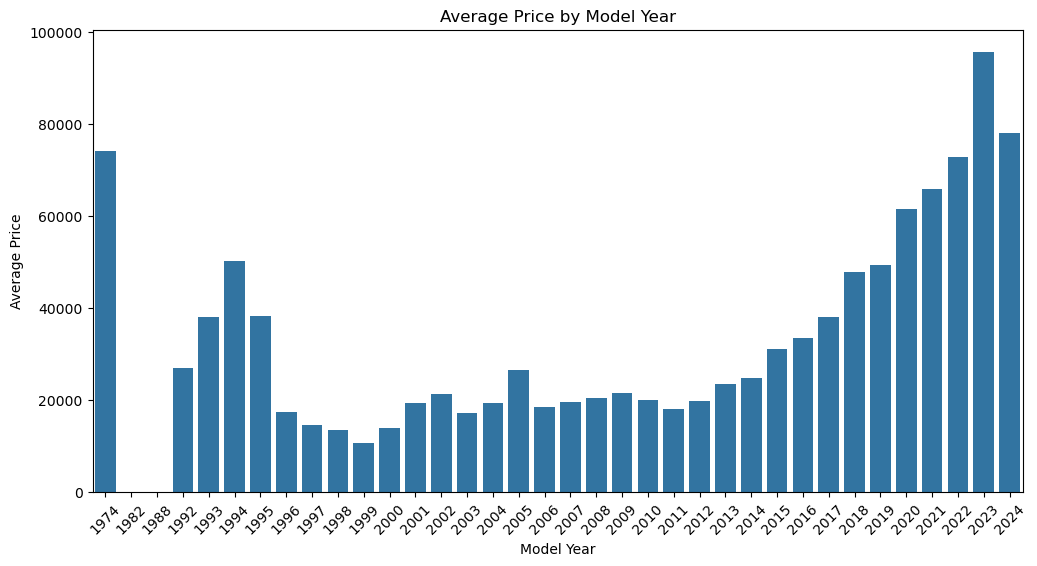

In [178]:
plt.figure(figsize=(12, 6))
sns.barplot(x='model_year', y='price', data=original, errorbar=None)
plt.title('Average Price by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

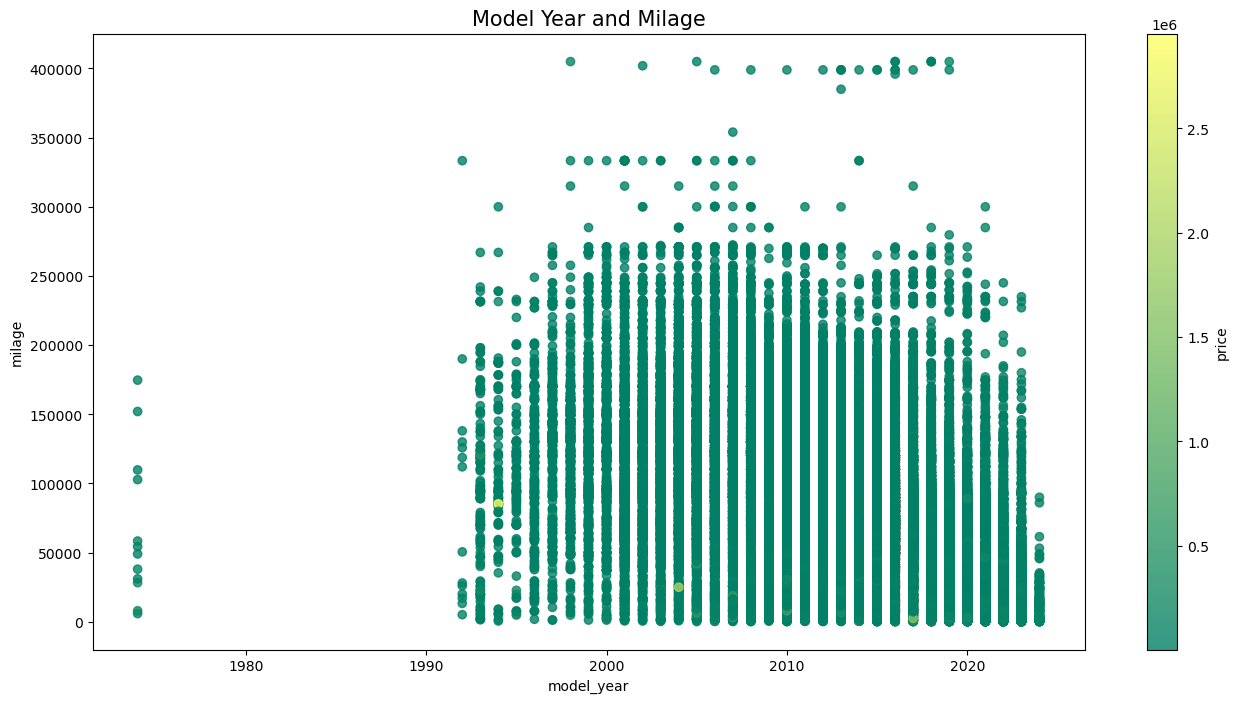

In [179]:
fig = plt.figure(figsize=(16,8))
plt.scatter(original['model_year'] , original['milage'], cmap = 'summer' ,c = original['price'] ,alpha = 0.8 )
plt.xlabel('model_year')
plt.ylabel('milage')
plt.colorbar(label = 'price')
plt.title('Model Year and Milage',size = 15);

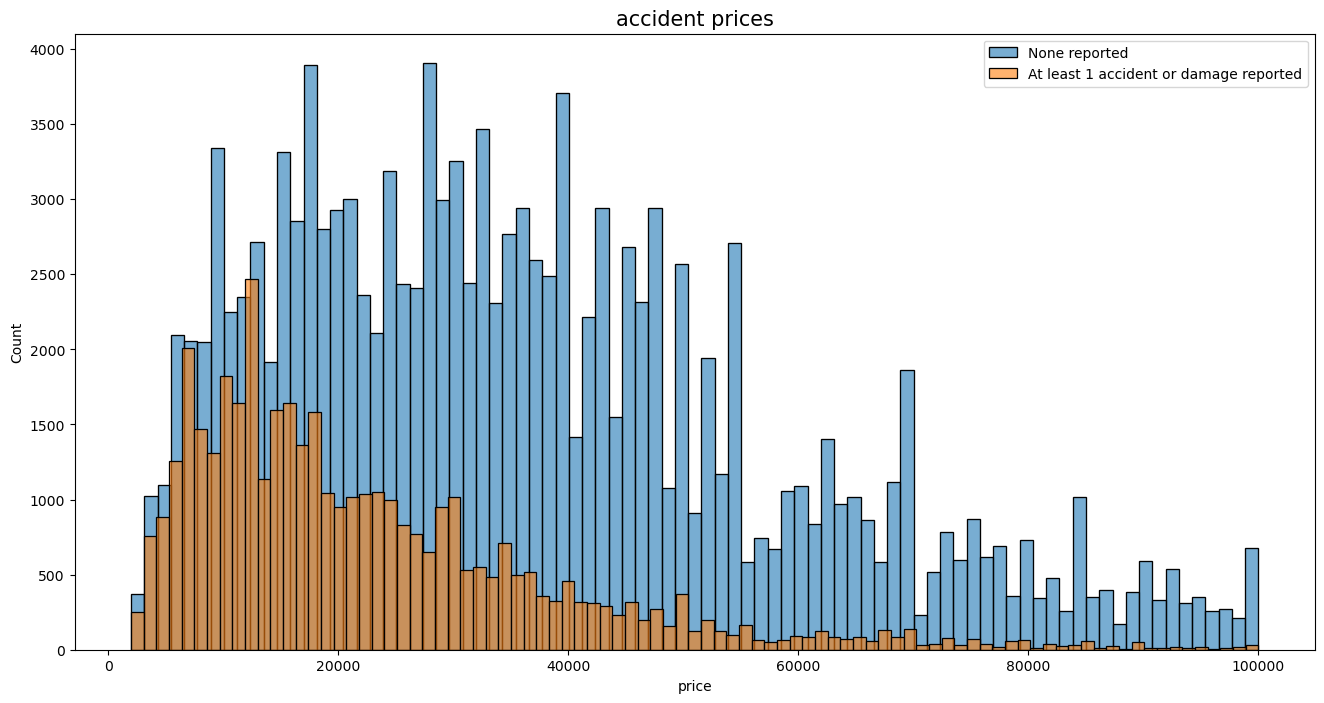

In [182]:
fig  ,ax= plt.subplots(figsize=(16,8))
sns.histplot(data =original[(original['accident'] =='None reported')&(original['price'] < 100_000)] ,  x = 'price',label = 'None reported' ,alpha = 0.6)
sns.histplot(data =original[(original['accident'] =='At least 1 accident or damage reported')&(original['price'] < 100_000)] ,  x = 'price' ,label = 'At least 1 accident or damage reported' ,alpha = 0.6)
plt.title('accident prices',size = 15)
plt.legend()
plt.show()

In [183]:
original.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200.0
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999.0
2,Chevrolet,Silverado 2500 LT,2002,136731,Flex,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900.0
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000.0
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500.0


In [184]:
original.tail()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
314218,Mercedes-Benz,GL-Class GL 450 4MATIC,2014,83315,Gasoline,362.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Black,None reported,Yes,NaN
314219,Audi,Q7 55 Prestige,2019,29336,Gasoline,3.0 Liter Turbo,Automatic,White,Black,None reported,No,NaN
314220,Audi,A6 3.0T Premium Plus,2012,77634,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,NaN
314221,Audi,Q7 3.0T Premium,2012,112000,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,NaN
314222,Chevrolet,Tahoe LT,2018,66840,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Black,None reported,Yes,NaN


In [185]:
original.shape

(314223, 12)

In [186]:
def get_new_features(data: pd.DataFrame):
    data = data.copy()
    
    # Creating car age 
    if 'model_year' in data.columns:
        data['car_age'] = 2024 - data['model_year'] + 1

    # Creating mileage per year
    if 'milage' in data.columns:
        data['mileage_per_year'] = data['milage'] / data['car_age']

    # Creating mileage with age
    if 'milage' in data.columns and 'car_age' in data.columns:
        data['mileage_with_age'] = data.groupby('car_age')['milage'].transform('mean').fillna(data['milage'].mean())

    # Creating mileage per year with age
    if 'mileage_per_year' in data.columns and 'car_age' in data.columns:
        data['mileage_per_year_with_age'] = data.groupby('car_age')['mileage_per_year'].transform('mean').fillna(data['mileage_per_year'].mean())

    # Creating power to weight ratio
    if 'hp' in data.columns and 'engine_' in data.columns:
        data['power_to_weight_ratio'] = (data['hp'] / data['engine_']).astype(float)

    # Adding separate feature for luxury and supercar brands
    luxury_and_supercar_brands = [
        "Mercedes-Benz", "BMW", "Audi", "Lexus", "Acura", "Jaguar", 
        "INFINITI", "Cadillac", "Land", "Lincoln", "Volvo", "Tesla",
        "Maserati", "Bentley", "Genesis", "Ferrari", "Rolls-Royce",
        "Aston", "McLaren", "Bugatti", "Lamborghini", "Porsche", "Maybach"
    ]
    if 'brand' in data.columns:
        data['is_luxury'] = data['brand'].isin(luxury_and_supercar_brands).astype(int)
    
    return data

# Apply the feature creation function to train_data
original = get_new_features(original)


In [187]:
original.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,car_age,mileage_per_year,mileage_with_age,mileage_per_year_with_age,is_luxury
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200.0,18,11833.333333,119070.619650,6615.034425,0
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999.0,23,6228.260870,119616.498612,5200.717331,1
2,Chevrolet,Silverado 2500 LT,2002,136731,Flex,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900.0,23,5944.826087,119616.498612,5200.717331,0
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000.0,8,2437.500000,68016.149142,8502.018643,1
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500.0,4,1847.000000,29210.023980,7302.505995,1


In [188]:
original.tail()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,car_age,mileage_per_year,mileage_with_age,mileage_per_year_with_age,is_luxury
314218,Mercedes-Benz,GL-Class GL 450 4MATIC,2014,83315,Gasoline,362.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Black,None reported,Yes,NaN,11,7574.090909,87646.531438,7967.866494,1
314219,Audi,Q7 55 Prestige,2019,29336,Gasoline,3.0 Liter Turbo,Automatic,White,Black,None reported,No,NaN,6,4889.333333,46199.660103,7699.943351,1
314220,Audi,A6 3.0T Premium Plus,2012,77634,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,NaN,13,5971.846154,103758.686906,7981.437454,1
314221,Audi,Q7 3.0T Premium,2012,112000,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,NaN,13,8615.384615,103758.686906,7981.437454,1
314222,Chevrolet,Tahoe LT,2018,66840,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Black,None reported,Yes,NaN,7,9548.571429,51880.738234,7411.534033,0


Feature Engineering

In [191]:
original['clean_title'] = original['clean_title'].map({'Yes': 0, 'No': 1})

In [192]:
original['accident'] = original['accident'].map({'None reported': 0, 'At least 1 accident or damage reported': 1})
#test_data['accident'] = test_data['accident'].map({'None reported': 0, 'At least 1 accident or damage reported': 1})

In [193]:
# Fuel Type Features (One-Hot Encoding)
original['fuel_type_combustion'] = original['fuel_type'].isin(['Gasoline', 'Diesel']).astype(int)
original['fuel_type_electric'] = original['fuel_type'].isin(['Electric', 'Hybrid', 'Plug-In Hybrid']).astype(int)

In [194]:
# Fuel Type Features (One-Hot Encoding)
#test_data['fuel_type_combustion'] = test_data['fuel_type'].isin(['Gasoline', 'Diesel']).astype(int)
#test_data['fuel_type_electric'] = test_data['fuel_type'].isin(['Electric', 'Hybrid', 'Plug-In Hybrid']).astype(int)

In [195]:
#train_data.drop(['fuel_type'], axis=1, inplace=True)

In [196]:
#test_data.drop(['fuel_type'], axis=1, inplace=True)

In [198]:
#train_data.drop(['ext_col','int_col'], axis=1, inplace=True)
#test_data.drop(['ext_col','int_col'], axis=1, inplace=True)

In [199]:
original['clean_title'].unique()

array([0, 1], dtype=int64)

In [200]:
original['fuel_type'].unique()

array(['Gasoline', 'Flex', 'NA', 'Hybrid', 'Diesel', '–', 'not supported'],
      dtype=object)

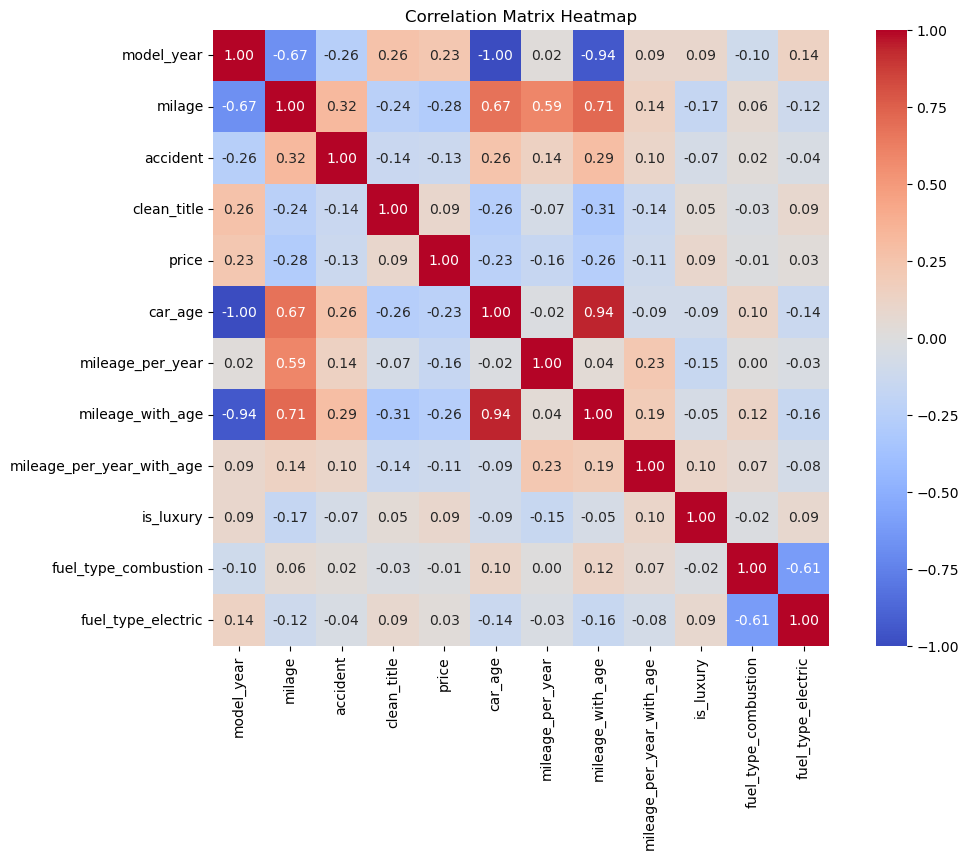

In [201]:
numeric_columns = original.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 8))  # Set the figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)

# Step 3: Show the plot
plt.title('Correlation Matrix Heatmap')
plt.show()

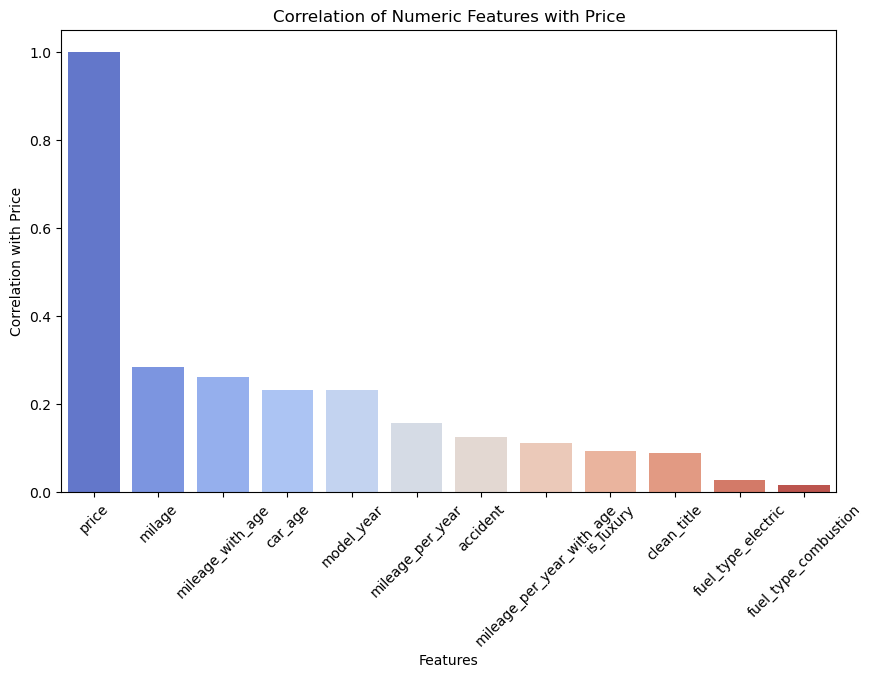

In [202]:
# Step 3: Extract correlations with respect to 'price'
price_correlations = correlation_matrix['price'].abs().sort_values(ascending=False)

# Step 4: Visualize the correlations using a bar plot

plt.figure(figsize=(10, 6))  # Set the figure size for better readability
sns.barplot(x=price_correlations.index, y=price_correlations.values, palette='coolwarm')
plt.title('Correlation of Numeric Features with Price')
plt.xlabel('Features')
plt.ylabel('Correlation with Price')
plt.xticks(rotation=45)
plt.show()

In [203]:
#train_data.drop(['fuel_type_combustion','fuel_type_electric','engine','transmission','ext_col','int_col','clean_title','is_luxury','mileage_per_year_with_age'], axis=1, inplace=True)
#test_data.drop(['fuel_type_combustion','fuel_type_electric','engine','transmission','ext_col','int_col','clean_title','is_luxury','mileage_per_year_with_age'], axis=1, inplace=True)

In [204]:
#train_data.drop('fuel_type', axis=1, inplace=True)
#test_data.drop('fuel_type', axis=1, inplace=True)

In [205]:
original.dtypes

brand                         object
model                         object
model_year                     int64
milage                         int64
fuel_type                     object
engine                        object
transmission                  object
ext_col                       object
int_col                       object
accident                       int64
clean_title                    int64
price                        float64
car_age                        int64
mileage_per_year             float64
mileage_with_age             float64
mileage_per_year_with_age    float64
is_luxury                      int32
fuel_type_combustion           int32
fuel_type_electric             int32
dtype: object

In [206]:
from sklearn.preprocessing import LabelEncoder
    # Label Encoding for categorical variables
label_encoder_brand = LabelEncoder()
label_encoder_model = LabelEncoder()
    
# Fit-transform on training data
original['brand'] = label_encoder_brand.fit_transform(original['brand'])
#test_data['brand'] = label_encoder_brand.fit_transform(test_data['brand'])

# Fit-transform on testing data
original['model'] = label_encoder_model.fit_transform(original['model'])
#test_data['model'] = label_encoder_model.fit_transform(test_data['model'])

# Fit-transform on training data
original['fuel_type'] = label_encoder_brand.fit_transform(original['fuel_type'])
#test_data['fuel_type'] = label_encoder_model.fit_transform(test_data['fuel_type'])

# Fit-transform on testing data
original['engine'] = label_encoder_brand.fit_transform(original['engine'])
#test_data['engine'] = label_encoder_model.fit_transform(test_data['engine'])

# Fit-transform on testing data
original['transmission'] = label_encoder_brand.fit_transform(original['transmission'])
#test_data['transmission'] = label_encoder_model.fit_transform(test_data['transmission'])

# Fit-transform on testing data
original['ext_col'] = label_encoder_brand.fit_transform(original['ext_col'])
#test_data['ext_col'] = label_encoder_model.fit_transform(test_data['ext_col'])

# Fit-transform on testing data
original['int_col'] = label_encoder_brand.fit_transform(original['int_col'])
#test_data['int_col'] = label_encoder_model.fit_transform(test_data['int_col'])

#train_data.drop(['engine','transmission','ext_col','int_col'],axis=1)

In [208]:
#train_data=train_data.drop(['engine','transmission','ext_col','int_col'],axis=1)

In [209]:
original.dtypes

brand                          int32
model                          int32
model_year                     int64
milage                         int64
fuel_type                      int32
engine                         int32
transmission                   int32
ext_col                        int32
int_col                        int32
accident                       int64
clean_title                    int64
price                        float64
car_age                        int64
mileage_per_year             float64
mileage_with_age             float64
mileage_per_year_with_age    float64
is_luxury                      int32
fuel_type_combustion           int32
fuel_type_electric             int32
dtype: object

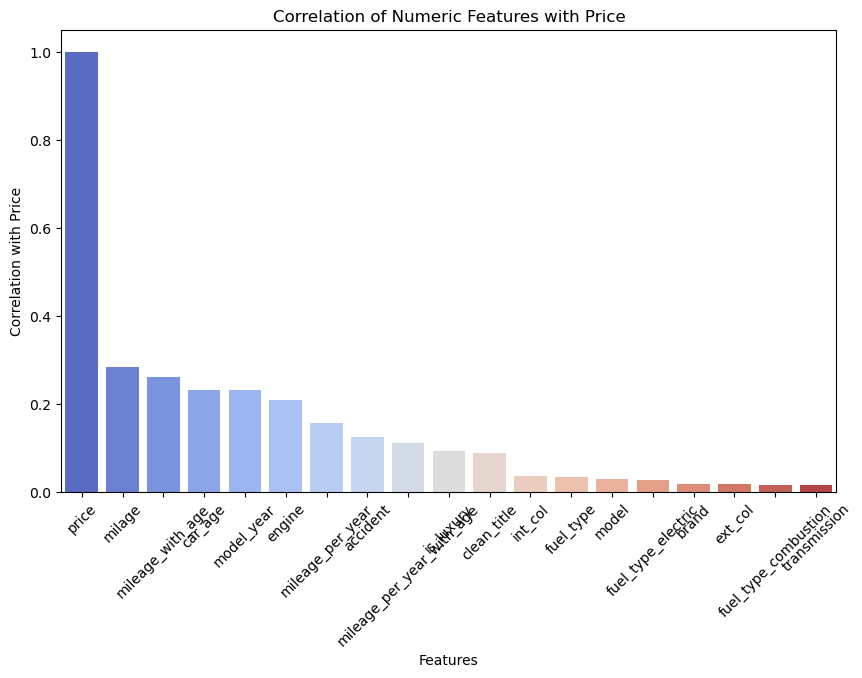

In [210]:
numeric_columns = original.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

# Step 3: Extract correlations with respect to 'price'
price_correlations = correlation_matrix['price'].abs().sort_values(ascending=False)

# Step 4: Visualize the correlations using a bar plot

plt.figure(figsize=(10, 6))  # Set the figure size for better readability
sns.barplot(x=price_correlations.index, y=price_correlations.values, palette='coolwarm')
plt.title('Correlation of Numeric Features with Price')
plt.xlabel('Features')
plt.ylabel('Correlation with Price')
plt.xticks(rotation=45)
plt.show()

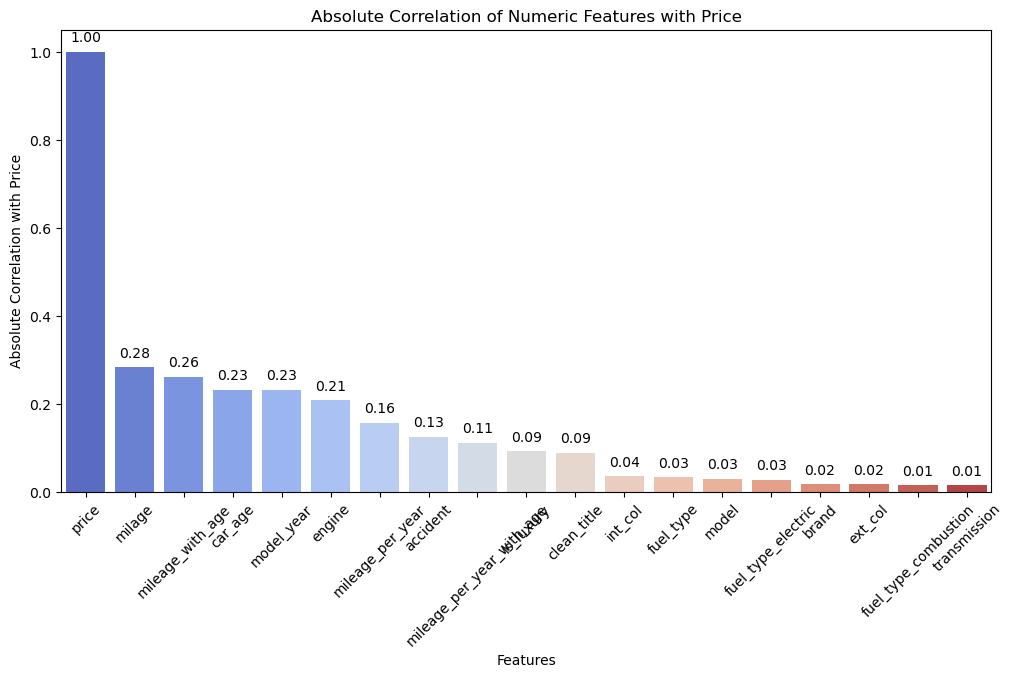

Features to drop due to low correlation with price: ['is_luxury', 'clean_title', 'int_col', 'fuel_type', 'model', 'fuel_type_electric', 'brand', 'ext_col', 'fuel_type_combustion', 'transmission']


In [211]:
plt.figure(figsize=(12, 6))  # Set the figure size for better readability
ax = sns.barplot(x=price_correlations.index, y=price_correlations.values, palette='coolwarm')

# Annotate the bars with the correlation values
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Absolute Correlation of Numeric Features with Price')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation with Price')
plt.xticks(rotation=45)
plt.show()

# Step 5: Identify features to drop
# Assuming you want to drop features with correlation less than 0.1
low_correlation_threshold = 0.1
features_to_drop = price_correlations[price_correlations < low_correlation_threshold].index.tolist()
print("Features to drop due to low correlation with price:", features_to_drop)

In [212]:
columns_to_drop = ['int_col', 'model', 'fuel_type_electric', 
                   'ext_col', 'transmission', 'fuel_type', 'brand', 'fuel_type_combustion']
original = original.drop(columns=columns_to_drop,axis=1)


In [213]:
original.shape

(314223, 11)

In [215]:
# Original train and test shapes
train_rows = 188533
test_rows = 125690

# Split the combined DataFrame back into train and test DataFrames
train_data = original.iloc[:train_rows, :]
test_data = original.iloc[train_rows:(train_rows + test_rows), :]

# Verify the shapes
print("Original train shape:", train_data.shape)  # Should be (188533, 9)
print("Original test shape:", test_data.shape)    # Should be (125690, 9)

Original train shape: (188533, 11)
Original test shape: (125690, 11)


In [216]:
test_data.head()

,model_year,milage,engine,accident,clean_title,price,car_age,mileage_per_year,mileage_with_age,mileage_per_year_with_age,is_luxury
188533,2015,98000,326,0,0,NaN,10,9800.000000,81702.276090,8170.227609,1
188534,2020,9142,788,0,0,NaN,5,1828.400000,34357.310823,6871.462165,1
188535,2022,28121,541,0,1,NaN,3,9373.666667,17845.219164,5948.406388,0
188536,2016,61258,193,0,1,NaN,9,6806.444444,76094.790228,8454.976692,1
188537,2018,59000,365,0,0,NaN,7,8428.571429,51880.738234,7411.534033,1


Case 1

In [218]:
Y_train = train_data['price']

X_train = train_data.drop('price',axis=1)

Y_test = test_data['price']

X_test = test_data.drop('price',axis=1)

In [219]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [220]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform train data
X_test_scaled = scaler.transform(X_test) 

In [221]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)  # Fit and transform train data
X_test_pca = pca.transform(X_test_scaled) 

In [222]:
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

In [223]:
predictions = {}
metrics = []


In [224]:
for model_name, model in models.items():
    # Train the model on the processed train data
    model.fit(X_train_pca, Y_train)
    
    # Make predictions on the training set for metrics
    train_preds = model.predict(X_train_pca)
    
    # Calculate RMSE and R²
    rmse = np.sqrt(mean_squared_error(Y_train, train_preds))
    r2 = r2_score(Y_train, train_preds)
    metrics.append((model_name, rmse, r2))
    
    # Make predictions on the processed test data
    predictions[model_name] = model.predict(X_test_pca)
    print(f"{model_name} - RMSE: {rmse:.4f}, R²: {r2:.4f}")


Decision Tree - RMSE: 27026.5278, R²: 0.8824
Gradient Boosting - RMSE: 70992.6303, R²: 0.1887
XGBoost - RMSE: 59475.6529, R²: 0.4306
Random Forest - RMSE: 37370.6061, R²: 0.7752


In [225]:
for model_name, preds in predictions.items():
    submission = pd.DataFrame({
        'id': range(1, len(preds) + 1),
        'predicted_price': preds
    })
    filename = f'predicted_prices_{model_name.replace(" ", "_").lower()}.csv'
    submission.to_csv(filename, index=False)
    print(f"Predicted prices for {model_name} saved in '{filename}'")


Predicted prices for Decision Tree saved in 'predicted_prices_decision_tree.csv'
Predicted prices for Gradient Boosting saved in 'predicted_prices_gradient_boosting.csv'
Predicted prices for XGBoost saved in 'predicted_prices_xgboost.csv'
Predicted prices for Random Forest saved in 'predicted_prices_random_forest.csv'


In [226]:
# Step 5: Print a summary of metrics
print("\nModel Performance on Training Data:")
for model_name, rmse, r2 in metrics:
    print(f"{model_name} - RMSE: {rmse:.4f}, R²: {r2:.4f}")


Model Performance on Training Data:
Decision Tree - RMSE: 27026.5278, R²: 0.8824
Gradient Boosting - RMSE: 70992.6303, R²: 0.1887
XGBoost - RMSE: 59475.6529, R²: 0.4306
Random Forest - RMSE: 37370.6061, R²: 0.7752
